## Machine Learning Develop


## Unsupervised Learning


In [1]:
#Importamos y guardamos el dataframe

import pandas as pd

RUTA_DATAFRAME = '/media/tr4shhh/Tr4Shhh_FOLDER/Proyects/4geeks/21_Unsupervised_learning/unsupervised-learning/data/raw/housing.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [2]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


I eliminate the columns I do not need

In [3]:
df.drop(['HouseAge','AveRooms', 'AveBedrms', 'Population','AveOccup', 'MedHouseVal'], axis=1, inplace=True)

In [4]:

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42)

X_train


,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80
...,...,...,...
11284,6.3700,33.78,-117.96
11964,3.0500,34.02,-117.43
5390,2.9344,34.03,-118.38
860,5.7192,37.58,-121.96


I train the model

In [5]:
from sklearn.cluster import KMeans

# Entrenar el modelo

model = KMeans(n_clusters = 6, random_state = 42)

model.fit(X_train)



/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [6]:
#save the clusters

y_train = list(model.labels_)
X_train["num_cluster"] = y_train
X_train


,MedInc,Latitude,Longitude,num_cluster
14196,3.2596,32.71,-117.03,2
8267,3.8125,33.77,-118.16,2
17445,4.1563,34.66,-120.48,0
14265,1.9425,32.69,-117.11,2
2271,3.5542,36.78,-119.80,0
...,...,...,...,...
11284,6.3700,33.78,-117.96,3
11964,3.0500,34.02,-117.43,2
5390,2.9344,34.03,-118.38,2
860,5.7192,37.58,-121.96,5


I plot the clusters

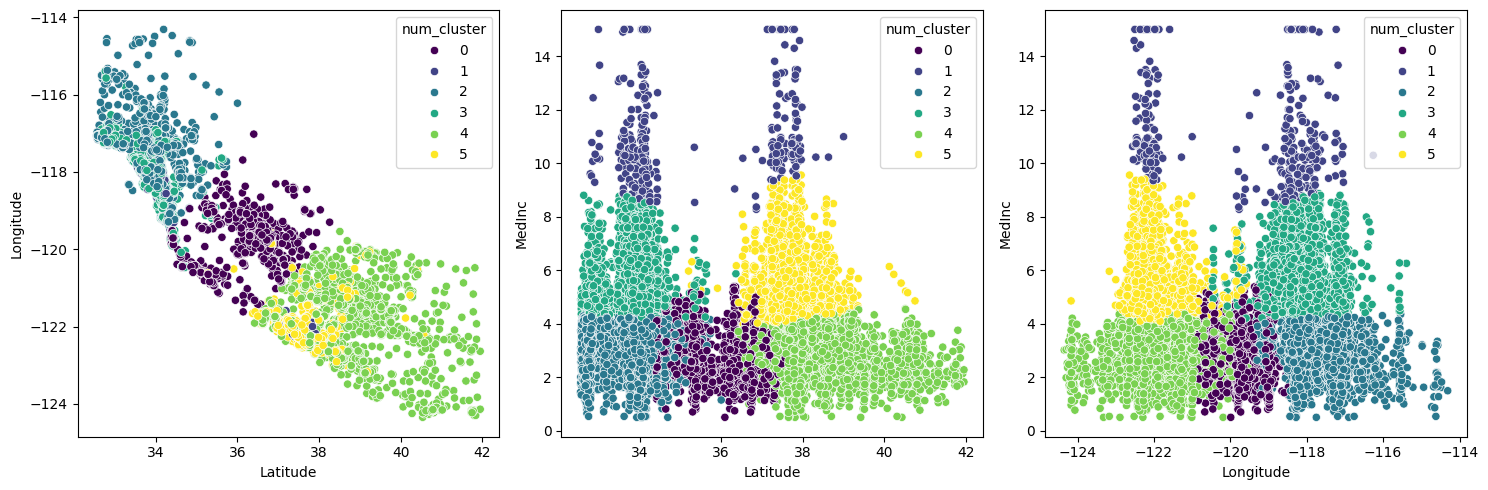

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplot_mosaic([['a','b','c']], figsize = (15, 5))

sns.scatterplot(ax = axis['a'], data = X_train, x = "Latitude", y = "Longitude", hue = "num_cluster", palette = "viridis")
sns.scatterplot(ax = axis['b'], data = X_train, x = "Latitude", y = "MedInc", hue = "num_cluster", palette = "viridis")
sns.scatterplot(ax = axis['c'], data = X_train, x = "Longitude", y = "MedInc", hue = "num_cluster", palette = "viridis")
plt.tight_layout()

plt.show()

I predict with the test set

In [8]:
y_test = list(model.predict(X_test))
X_test["num_cluster"] = y_test
X_test

,MedInc,Latitude,Longitude,num_cluster
20046,1.6812,36.06,-119.01,0
3024,2.5313,35.14,-119.46,0
15663,3.4801,37.80,-122.44,4
20484,5.7376,34.28,-118.72,3
9814,3.7250,36.62,-121.93,4
...,...,...,...,...
15362,4.6050,33.36,-117.22,3
16623,2.7266,35.36,-120.83,0
18086,9.2298,37.31,-122.05,5
2144,2.7850,36.77,-119.76,0


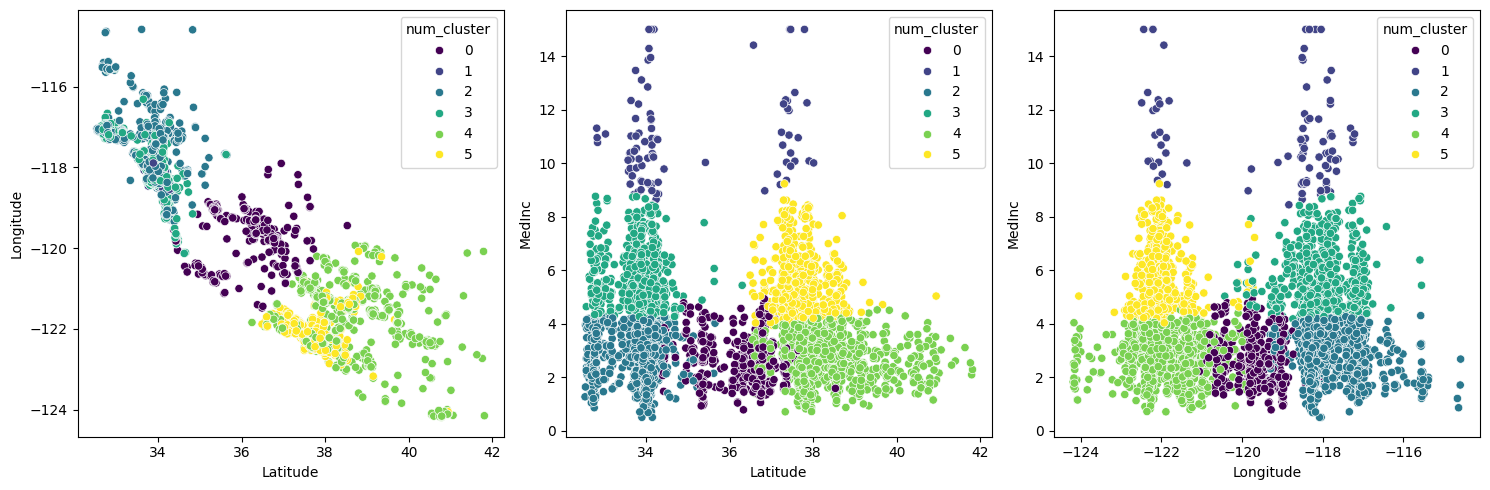

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplot_mosaic([['a','b','c']], figsize = (15, 5))

sns.scatterplot(ax = axis['a'], data = X_test, x = "Latitude", y = "Longitude", hue = "num_cluster", palette = "viridis")
sns.scatterplot(ax = axis['b'], data = X_test, x = "Latitude", y = "MedInc", hue = "num_cluster", palette = "viridis")
sns.scatterplot(ax = axis['c'], data = X_test, x = "Longitude", y = "MedInc", hue = "num_cluster", palette = "viridis")
plt.tight_layout()

plt.show()

#### With the data obtained from unsupervised, i train a supervised model

In [10]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Precisión del modelo: 1.00


In [13]:
import pickle

#Cambiar el objeto por el que queramos guardar
objeto = model

ruta_guardado = '../models/k_means.pkl'

with open(ruta_guardado, "wb") as archivo:
    pickle.dump(objeto, archivo)

In [14]:
import pickle

#Cambiar el objeto por el que queramos guardar
objeto = rf_model

ruta_guardado = '../models/random_forest.pkl'

with open(ruta_guardado, "wb") as archivo:
    pickle.dump(objeto, archivo)